# Get patch level label based on geojson annotations
The QuPath regional annotations (polygons) can be saved into standard geojson files. 
Within this public dataset, the file format is compatible to QuPath (can be imported into QuPath directly).
In the 


processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-2A-A8VO-01Z-00-DX1.3A69CC37-B066-4529-B1BE-AD155983AAA7.geojson
processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-2A-A8VL-01Z-00-DX1.2C2BD6EF-EC17-4117-AE89-A22B67AFB233.geojson
processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-2A-AAYF-01Z-00-DX1.D0ADEB9A-37A4-451C-B91C-4AB014A6857A.geojson
processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-2A-A8W3-01Z-00-DX1.CC00522F-8A47-4C63-B9CC-F215F9EAAFBA.geojson
processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-2A-A8VV-01Z-00-DX1.DD094519-863E-42EF-8B36-F52418265E3E.geojson
processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-EJ-5501-01Z-00-DX1.b948a611-e351-417f-8f32-bd139728ce64.geojson
processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-EJ-5502-01Z-00-DX1.9caa4792-06a2-431d-bec3-8b17f41453fe.geojson
processing /data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-EJ-5515-01Z-00-D

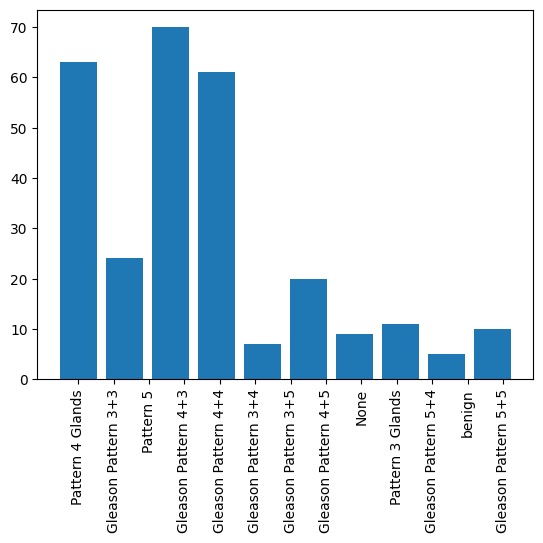

In [ ]:
# Check the statistic of the annotation data
import h5py, os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from glob import glob

anno_data_dir = "/data/jjiang10/Data/ProstatePathology/dataset/PRAD"
geojson_fn_list = glob(os.path.join(anno_data_dir, "*.geojson"))

label_list = []
for geojson_fn in geojson_fn_list:
    print("processing " + geojson_fn)
    polygons = gpd.read_file(geojson_fn)
    for _, row in polygons.iterrows():
        if 'classification'in row.keys():
            if row['classification'] is not None:
                classification = eval(row['classification'])  # Convert the string to a dictionary
                label = classification['name']
            else:
                label = 'None'
            label_list.append(label)
            # print("None in the classification")
#         classification = eval(row['classification'])  # Convert the string to a dictionary
#         label = classification['name']
#         label_list.append(label)
print("Total number of annotated regions: %d" %len(label_list))
print(set(label_list))
plt.hist(label_list, align='left', rwidth=0.8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# TODO: Write code to get patch level label based on geojason annotations
# Install the required libraries
# pip install shapely geopandas h5py


patch_data_dir = "/data/jjiang10/Data/ProstatePathology/processed/patches"
slide_name = "TCGA-YL-A9WI-01Z-00-DX4.DD0313AF-7339-45F1-B3CF-AE9C20679E7F"
geojson_anno_fn = os.path.join(anno_data_dir, slide_name + ".geojson")   
patch_loc_fn = os.path.join(patch_data_dir, slide_name + ".h5") 

# Load the GeoJSON file
polygons = gpd.read_file(geojson_anno_fn)

# Function to assign labels to image patches
def assign_labels(image_patches, polygons):
    labeled_patches = []
    for patch in image_patches:
        point = Point(patch['coordinates'])
        label = "None"  # Default label
        for _, row in polygons.iterrows():
            if row['classification'] is not None:
                if row['geometry'].contains(point):
                    classification = eval(row['classification'])  # Convert the string to a dictionary
                    label = classification['name']
                    break
            else:
                label = 'None'
        labeled_patches.append({'id': patch['id'], 'coordinates': patch['coordinates'], 'label': label})
    return labeled_patches

# Load the HDF5 file
with h5py.File(patch_loc_fn, 'r') as h5_file:
    coords = h5_file['coords'][:]

# Convert coordinates to a list of dictionaries
image_patches = [{'id': i, 'coordinates': (coord[0], coord[1])} for i, coord in enumerate(coords)]
print("Number of image patches:", len(image_patches))
# Assign labels to the image patches
labeled_patches = assign_labels(image_patches, polygons)

# Print the labeled patches
for patch in labeled_patches:
    print(f"Patch ID: {patch['id']}, Coordinates: {patch['coordinates']}, Label: {patch['label']}")

print("Number of labeled patches:", len(labeled_patches))

Number of image patches: 75311
Patch ID: 4146, Coordinates: (np.int64(14624), np.int64(41408)), Label: Gleason Pattern 3+4
Patch ID: 4147, Coordinates: (np.int64(14624), np.int64(41664)), Label: Gleason Pattern 3+4
Patch ID: 4148, Coordinates: (np.int64(14624), np.int64(41920)), Label: Gleason Pattern 3+4
Patch ID: 4149, Coordinates: (np.int64(14624), np.int64(42176)), Label: Gleason Pattern 3+4
Patch ID: 4150, Coordinates: (np.int64(14624), np.int64(42432)), Label: Gleason Pattern 3+4
Patch ID: 4151, Coordinates: (np.int64(14624), np.int64(42688)), Label: Gleason Pattern 3+4
Patch ID: 4152, Coordinates: (np.int64(14624), np.int64(42944)), Label: Gleason Pattern 3+4
Patch ID: 4153, Coordinates: (np.int64(14624), np.int64(43200)), Label: Gleason Pattern 3+4
Patch ID: 4154, Coordinates: (np.int64(14624), np.int64(43456)), Label: Gleason Pattern 3+4
Patch ID: 4155, Coordinates: (np.int64(14624), np.int64(43712)), Label: Gleason Pattern 3+4
Patch ID: 4156, Coordinates: (np.int64(14624), np